In [1]:

import pandas as pd
import numpy as np
import requests

Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)


1.Вивести перших 5 рядків

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)   # зчитати всі таблиці
df = tables[2]                # потрібна таблиця (може змінюватись!), номери не є сталими!
df.head()

/tmp/ipython-input-3107767188.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)   # зчитати всі таблиці


,Country/Territory,IMF (2025)[6],World Bank (2024)[7],United Nations (2023)[8]
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495


In [3]:
df.columns

Index(['Country/Territory', 'IMF (2025)[6]', 'World Bank (2024)[7]',
       'United Nations (2023)[8]'],
      dtype='object')

2.Визначити розмір датасета.

In [4]:
df.info

<bound method DataFrame.info of     Country/Territory IMF (2025)[6] World Bank (2024)[7]  \
0               World     117165394            111326370   
1       United States      30615743             29184890   
2          China[n 1]      19398577             18743803   
3             Germany       5013574              4659929   
4               Japan       4279828              4026211   
..                ...           ...                  ...   
217          Kiribati           321                  308   
218  Marshall Islands           302                  280   
219             Nauru           172                  160   
220        Montserrat             —                    —   
221            Tuvalu            58                   62   

    United Nations (2023)[8]  
0                  100834796  
1                   27720700  
2                   17794782  
3                    4525704  
4                    4204495  
..                       ...  
217                      289  
218                      270  
219                      176  
220                       80  
221                       68  

[222 rows x 4 columns]>

3.Визначити оптимальну кількість стовпців.

In [5]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  # прибрати [1], [6], ...
              .str.replace('Country/Territory', 'Country', regex=False))
df

,Country,IMF (2025),World Bank (2024),United Nations (2023)
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495
...,...,...,...,...
217,Kiribati,321,308,289
218,Marshall Islands,302,280,270
219,Nauru,172,160,176
220,Montserrat,—,—,80


4.Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.  

In [6]:
df.isnull().sum()


,0
Country,0
IMF (2025),0
World Bank (2024),0
United Nations (2023),0


In [8]:
df['IMF (2025)'] = pd.to_numeric(df['IMF (2025)'], errors='coerce')
df['World Bank (2024)'] = pd.to_numeric(df['World Bank (2024)'], errors='coerce')
df['United Nations (2023)'] = pd.to_numeric(df['United Nations (2023)'], errors='coerce')
print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Country                   object
IMF (2025)               float64
World Bank (2024)        float64
United Nations (2023)    float64
dtype: object


,Country,IMF (2025),World Bank (2024),United Nations (2023)
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,29184890.0,27720700.0
2,China[n 1],19398577.0,18743803.0,17794782.0
3,Germany,5013574.0,4659929.0,4525704.0
4,Japan,4279828.0,4026211.0,4204495.0
5,India,4125213.0,3912686.0,3575778.0
6,United Kingdom,3958780.0,3643834.0,3380855.0
7,France,3361557.0,3162079.0,3051832.0
8,Italy,2543677.0,2372775.0,2300941.0
9,Russia,2540656.0,2173836.0,2008419.0


5.Ще раз вивести детасет

In [17]:
df

,Country/Territory,IMF (2025)[6],World Bank (2024)[7],United Nations (2023)[8]
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495
...,...,...,...,...
217,Kiribati,321,308,289
218,Marshall Islands,302,280,270
219,Nauru,172,160,176
220,Montserrat,—,—,80


6.Перевірити наявність дублікатів. При наявності видалити дублікати.

In [19]:
df.duplicated().sum()

np.int64(0)

7.Вивести описову статистику датасету describe()

In [22]:
df.describe

<bound method NDFrame.describe of     Country/Territory IMF (2025)[6] World Bank (2024)[7]  \
0               World     117165394            111326370   
1       United States      30615743             29184890   
2          China[n 1]      19398577             18743803   
3             Germany       5013574              4659929   
4               Japan       4279828              4026211   
..                ...           ...                  ...   
217          Kiribati           321                  308   
218  Marshall Islands           302                  280   
219             Nauru           172                  160   
220        Montserrat             —                    —   
221            Tuvalu            58                   62   

    United Nations (2023)[8]  
0                  100834796  
1                   27720700  
2                   17794782  
3                    4525704  
4                    4204495  
..                       ...  
217                      289  
218                      270  
219                      176  
220                       80  
221                       68  

[222 rows x 4 columns]>

8. Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [9]:

df['IMF_WB_Diff'] = abs(df['IMF (2025)'] - df['World Bank (2024)'])
max_diff = df['IMF_WB_Diff'].max()
country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')
df.head(10)

World has the largest difference between IMF and WB: 5839024.0


,Country,IMF (2025),World Bank (2024),United Nations (2023),IMF_WB_Diff
0,World,117165394.0,111326370.0,100834796.0,5839024.0
1,United States,30615743.0,29184890.0,27720700.0,1430853.0
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0
3,Germany,5013574.0,4659929.0,4525704.0,353645.0
4,Japan,4279828.0,4026211.0,4204495.0,253617.0
5,India,4125213.0,3912686.0,3575778.0,212527.0
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0
7,France,3361557.0,3162079.0,3051832.0,199478.0
8,Italy,2543677.0,2372775.0,2300941.0,170902.0
9,Russia,2540656.0,2173836.0,2008419.0,366820.0


9. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [10]:
cor_IMF_WB = df['IMF (2025)'].corr(df['World Bank (2024)'])
cor_IMF_UN = df['IMF (2025)'].corr(df['United Nations (2023)'])
cor_WB_UN = df['World Bank (2024)'].corr(df['United Nations (2023)'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between  WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.9999888406778504
Correlation between IMF and UN: 0.9998453198373655
Correlation between  WB and UN: 0.9998797715362348


In [11]:
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

IMF and WB have the highest correlation


10.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [12]:
mean_IMF = df['IMF (2025)'].mean()
mean_IMF

np.float64(1225284.7512041887)

In [13]:
mean_WB = df['World Bank (2024)'].mean()
mean_WB

np.float64(1053087.8380952382)

In [14]:
mean_UN = df['United Nations (2023)'].mean()
mean_UN

np.float64(966541.7605633803)

11. Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [15]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

World has the highest standard deviation: 52405624.12461428


,Country,IMF (2025),World Bank (2024),United Nations (2023),IMF_WB_Diff,std
0,World,117165394.0,111326370.0,100834796.0,5839024.0,5.240562e+07
1,United States,30615743.0,29184890.0,27720700.0,1430853.0,1.392172e+07
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0,9.019537e+06
3,Germany,5013574.0,4659929.0,4525704.0,353645.0,2.199360e+06
4,Japan,4279828.0,4026211.0,4204495.0,253617.0,1.961166e+06
5,India,4125213.0,3912686.0,3575778.0,212527.0,1.843283e+06
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0,1.689703e+06
7,France,3361557.0,3162079.0,3051832.0,199478.0,1.501653e+06
8,Italy,2543677.0,2372775.0,2300941.0,170902.0,1.122076e+06
9,Russia,2540656.0,2173836.0,2008419.0,366820.0,9.631075e+05


12. Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [17]:
# Find max and min GDP for each year
max_IMF = df['IMF (2025)'].max(); min_IMF = df['IMF (2025)'].min()
max_WB = df['World Bank (2024)'].max(); min_WB = df['World Bank (2024)'].min()
max_UN = df['United Nations (2023)'].max(); min_UN = df['United Nations (2023)'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 117165394.0, Min IMF: 58.0
Max WB: 111326370.0, Min WB: 62.0
Max UN: 100834796.0, Min UN: 68.0


13. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

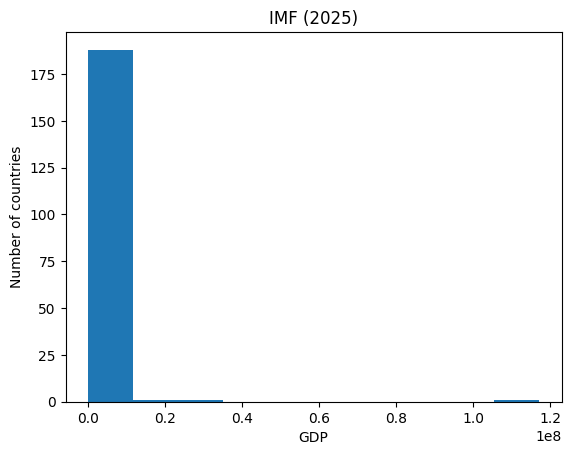

In [19]:
import matplotlib.pyplot as plt
# Build a histogram of IMF_Forecast
plt.hist(df['IMF (2025)'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

14.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [22]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF (2025)'] / df['IMF (2025)'].sum()
df['WB_Share'] = df['World Bank (2024)'] / df['World Bank (2024)'].sum()
df['UN_Share'] = df['United Nations (2023)'] / df['United Nations (2023)'].sum()

df.head(10)

,Country,IMF (2025),World Bank (2024),United Nations (2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
0,World,117165394.0,111326370.0,100834796.0,5839024.0,5.240562e+07,0.500644,0.503401,0.489790
1,United States,30615743.0,29184890.0,27720700.0,1430853.0,1.392172e+07,0.130820,0.131970,0.134649
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0,9.019537e+06,0.082889,0.084757,0.086436
3,Germany,5013574.0,4659929.0,4525704.0,353645.0,2.199360e+06,0.021423,0.021071,0.021983
4,Japan,4279828.0,4026211.0,4204495.0,253617.0,1.961166e+06,0.018288,0.018206,0.020423
5,India,4125213.0,3912686.0,3575778.0,212527.0,1.843283e+06,0.017627,0.017693,0.017369
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0,1.689703e+06,0.016916,0.016477,0.016422
7,France,3361557.0,3162079.0,3051832.0,199478.0,1.501653e+06,0.014364,0.014298,0.014824
8,Italy,2543677.0,2372775.0,2300941.0,170902.0,1.122076e+06,0.010869,0.010729,0.011176
9,Russia,2540656.0,2173836.0,2008419.0,366820.0,9.631075e+05,0.010856,0.009830,0.009756


15.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

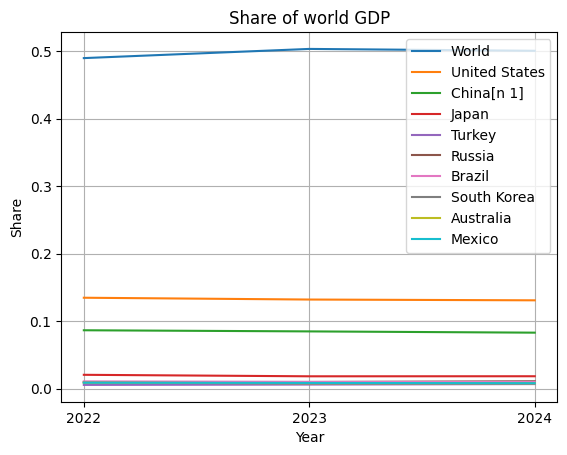

In [23]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()
